<a href="https://colab.research.google.com/github/TurinShayla/Python-Graph-Brain/blob/main/FunMotivation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [ ]:
#get the url
wb = gc.open_by_key('1SWN0twJvQHvM7_e5LFVMcTVoZ75EZl_YYkyXBeoGS8c')
#get the file
ws = wb.worksheet('SurveyFunMotivation')

# get_all_values gives a list of rows.
rows = ws.get_all_values()
print(rows)

[['ID', 'Condition', 'Age', 'Motivating', 'Fun', 'Interactive', 'Engaging', 'Brainstorming'], ['SU6052', 'Game (G)', '27', '4', '4', '4', '4', '4'], ['MA9343', 'Game (G)', '26', '4', '4', '3', '4', '3'], ['MY8520', 'Video (V)', '25', '3', '3', '4', '4', '4'], ['RW9053', 'Video (V)', '29', '5', '5', '5', '4', '4'], ['NAF5164', 'Game (G)', '31', '4', '5', '5', '5', '5'], ['sy8932', 'Video (V)', '33', '3', '3', '3', '3', '4'], ['DH6641', 'Video (V)', '28', '3', '4', '4', '4', '3'], ['DH5341', 'Game (G)', '24', '4', '4', '4', '4', '4'], ['DH3764', 'Game (G)', '25', '3', '4', '4', '4', '3'], ['DH9191', 'Video (V)', '25', '4', '4', '4', '4', '4'], ['NA1730', 'Video (V)', '33', '4', '4', '4', '4', '5'], ['DH6528', 'Game (G)', '28', '4', '4', '4', '4', '5'], ['', '', '27.83333333', '', '', '', '', ''], ['', '', '2.995366793', '', '', '', '', '']]


In [ ]:
import pandas as pd
#df=pd.DataFrame.from_records(rows)
df=pd.DataFrame.from_records(rows[1:],columns=rows[0])
print(df)

         ID  Condition          Age Motivating Fun Interactive Engaging  \
0    SU6052   Game (G)           27          4   4           4        4   
1    MA9343   Game (G)           26          4   4           3        4   
2    MY8520  Video (V)           25          3   3           4        4   
3    RW9053  Video (V)           29          5   5           5        4   
4   NAF5164   Game (G)           31          4   5           5        5   
5    sy8932  Video (V)           33          3   3           3        3   
6    DH6641  Video (V)           28          3   4           4        4   
7    DH5341   Game (G)           24          4   4           4        4   
8    DH3764   Game (G)           25          3   4           4        4   
9    DH9191  Video (V)           25          4   4           4        4   
10   NA1730  Video (V)           33          4   4           4        4   
11   DH6528   Game (G)           28          4   4           4        4   
12                      2

In [ ]:
grouped=df.groupby(df.Condition)
df_video=grouped.get_group("Video (V)")
df_game=grouped.get_group("Game (G)")

#df_video=pd.to_numeric(df_video,errors='coerce')
#df_game=pd.to_numeric(df_game,errors='coerce')

print(df_video)

        ID  Condition Age Motivating Fun Interactive Engaging Brainstorming
2   MY8520  Video (V)  25          3   3           4        4             4
3   RW9053  Video (V)  29          5   5           5        4             4
5   sy8932  Video (V)  33          3   3           3        3             4
6   DH6641  Video (V)  28          3   4           4        4             3
9   DH9191  Video (V)  25          4   4           4        4             4
10  NA1730  Video (V)  33          4   4           4        4             5


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
from scipy.stats import sem

In [ ]:
#df_video['Knowledge_gain']=pd.to_numeric(df_video['Knowledge_gain'],errors='coerce')
video_mean_Motivating=pd.to_numeric(df_video["Motivating"]).mean()
video_std_Motivating=pd.to_numeric(df_video['Motivating']).std()

video_mean_Fun=pd.to_numeric(df_video["Fun"]).mean()
video_std_Fun=pd.to_numeric(df_video['Fun']).std()

video_mean_Interactive=pd.to_numeric(df_video["Interactive"]).mean()
video_std_Interactive=pd.to_numeric(df_video['Interactive']).std()

video_mean_Engaging=pd.to_numeric(df_video["Engaging"]).mean()
video_std_Engaging=pd.to_numeric(df_video['Engaging']).std()

video_mean_Brainstorming=pd.to_numeric(df_video["Brainstorming"]).mean()
video_std_Brainstorming=pd.to_numeric(df_video['Brainstorming']).std()

#df_game['Knowledge_gain']=pd.to_numeric(df_game['Knowledge_gain'],errors='coerce')
game_mean_Motivating=pd.to_numeric(df_game["Motivating"]).mean()
game_std_Motivating=pd.to_numeric(df_game['Motivating']).std()

game_mean_Fun=pd.to_numeric(df_game["Fun"]).mean()
game_std_Fun=pd.to_numeric(df_game['Fun']).std()

game_mean_Interactive=pd.to_numeric(df_game["Interactive"]).mean()
game_std_Interactive=pd.to_numeric(df_game['Interactive']).std()

game_mean_Engaging=pd.to_numeric(df_game["Engaging"]).mean()
game_std_Engaging=pd.to_numeric(df_game['Engaging']).std()

game_mean_Brainstorming=pd.to_numeric(df_game["Brainstorming"]).mean()
game_std_Brainstorming=pd.to_numeric(df_game['Brainstorming']).std()

#print("Video knowledge gain", video_mean_Kg, video_std_Kg,"\n","Game knowledge gain", game_mean_Kg,game_std_Kg)

game_se_Motivating=sem(pd.to_numeric(df_game["Motivating"]))
game_se_Fun=sem(pd.to_numeric(df_game['Fun']))
game_se_Interactive=sem(pd.to_numeric(df_game['Interactive']))
game_se_Engaging=sem(pd.to_numeric(df_game['Engaging']))
game_se_Brainstorming=sem(pd.to_numeric(df_game['Brainstorming']))

In [ ]:
video_se_Motivating=sem(pd.to_numeric(df_video["Motivating"]))
video_se_Fun=sem(pd.to_numeric(df_video['Fun']))
video_se_Interactive=sem(pd.to_numeric(df_video['Interactive']))
video_se_Engaging=sem(pd.to_numeric(df_video['Engaging']))
video_se_Brainstorming=sem(pd.to_numeric(df_video['Brainstorming']))

game_se_Motivating=sem(pd.to_numeric(df_game["Motivating"]))
game_se_Fun=sem(pd.to_numeric(df_game['Fun']))
game_se_Interactive=sem(pd.to_numeric(df_game['Interactive']))
game_se_Engaging=sem(pd.to_numeric(df_game['Engaging']))
game_se_Brainstorming=sem(pd.to_numeric(df_game['Brainstorming']))

In [ ]:
def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')

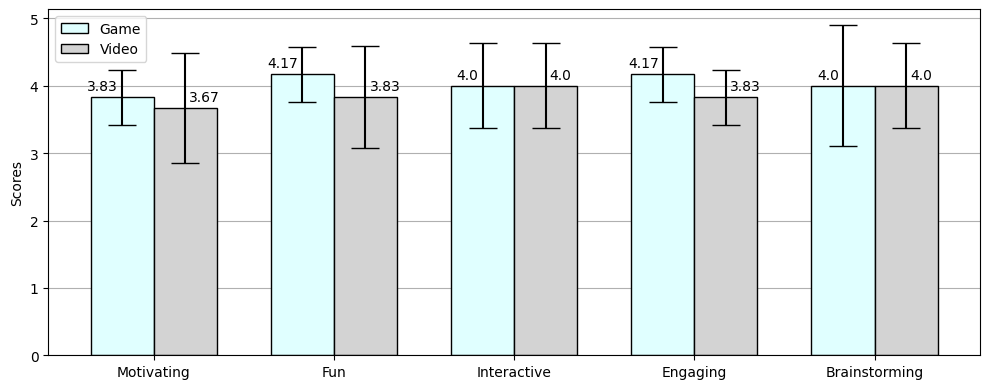

In [ ]:
#pre is game post is video
pre_mean,pre_std=(round(game_mean_Motivating,2),round(game_mean_Fun,2),round(game_mean_Interactive,2),round(game_mean_Engaging,2),round(game_mean_Brainstorming,2)),(game_std_Motivating, game_std_Fun,game_std_Interactive,game_std_Engaging,game_std_Brainstorming)
#post_mean,post_std=(round(game_mean_Post,2),round(video_mean_Post,2)),(game_std_Post,video_std_Post)
post_mean,post_std=(round(video_mean_Motivating,2),round(video_mean_Fun,2),round(video_mean_Interactive,2),round(video_mean_Engaging,2),round(video_mean_Brainstorming,2)),(video_std_Motivating, video_std_Fun,video_std_Interactive,video_std_Engaging,video_std_Brainstorming)

ind = np.arange(len(pre_mean))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 4))
rects1 = ax.bar(ind - width/2, pre_mean, width, yerr=pre_std, align='center',
                label='Game',        capsize=10, zorder=2,
       color=['lightcyan'],edgecolor='black')
rects2 = ax.bar(ind + width/2, post_mean, width, yerr=post_std, align='center',
                label='Video',        capsize=10, zorder=2,
       color=['lightgray'],edgecolor='black')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
#ax.set_title('')
ax.set_xticks(ind)
ax.set_xticklabels(('Motivating', 'Fun','Interactive','Engaging','Brainstorming'))
ax.legend(),
ax.yaxis.grid(True)
autolabel(rects1, "left")
autolabel(rects2, "right")

fig.tight_layout()

plt.savefig('fun_motivationSD.jpg',dpi=900)
plt.savefig('fun_motivationSD.pdf',dpi=1300)
#plt.show()

pre_mean,pre_se=(round(game_mean_Motivating,2),round(game_mean_Fun,2),round(game_mean_Interactive,2),round(game_mean_Engaging,2),round(game_mean_Brainstorming,2)),(game_se_Motivating, game_se_Fun,game_se_Interactive,game_se_Engaging,game_se_Brainstorming)
#post_mean,post_se=(round(game_mean_Post,2),round(video_mean_Post,2)),(game_se_Post,video_se_Post)
post_mean,post_se=(round(video_mean_Motivating,2),round(video_mean_Fun,2),round(video_mean_Interactive,2),round(video_mean_Engaging,2),round(video_mean_Brainstorming,2)),(video_se_Motivating, video_se_Fun,video_se_Interactive,video_se_Engaging,video_se_Brainstorming)

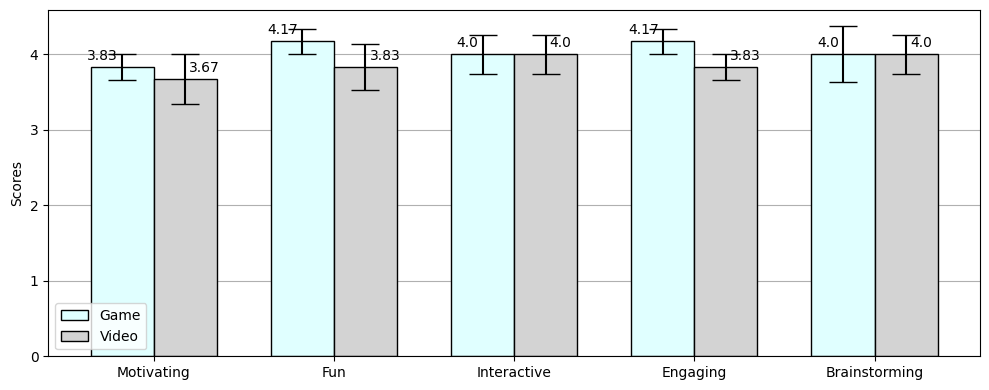

In [ ]:
#pre is game post is video
pre_mean,pre_se=(round(game_mean_Motivating,2),round(game_mean_Fun,2),round(game_mean_Interactive,2),round(game_mean_Engaging,2),round(game_mean_Brainstorming,2)),(game_se_Motivating, game_se_Fun,game_se_Interactive,game_se_Engaging,game_se_Brainstorming)
#post_mean,post_se=(round(game_mean_Post,2),round(video_mean_Post,2)),(game_se_Post,video_se_Post)
post_mean,post_se=(round(video_mean_Motivating,2),round(video_mean_Fun,2),round(video_mean_Interactive,2),round(video_mean_Engaging,2),round(video_mean_Brainstorming,2)),(video_se_Motivating, video_se_Fun,video_se_Interactive,video_se_Engaging,video_se_Brainstorming)
ind = np.arange(len(pre_mean))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 4))
rects1 = ax.bar(ind - width/2, pre_mean, width, yerr=pre_se, align='center',
                label='Game',        capsize=10, zorder=2,
       color=['lightcyan'],edgecolor='black')
rects2 = ax.bar(ind + width/2, post_mean, width, yerr=post_se, align='center',
                label='Video',        capsize=10, zorder=2,
       color=['lightgray'],edgecolor='black')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
#ax.set_title('')
ax.set_xticks(ind)
ax.set_xticklabels(('Motivating', 'Fun','Interactive','Engaging','Brainstorming'))
ax.legend(),
ax.yaxis.grid(True)
autolabel(rects1, "left")
autolabel(rects2, "right")

fig.tight_layout()

plt.savefig('fun_motivation.jpg',dpi=900)

plt.savefig('fun_motivation.pdf',dpi=1300)


In [ ]:
import scipy.stats as stats

# Define the columns for ANOVA and t-test
column_definition = 'column_name_definition'
column_quiz = 'column_name_quiz'

# Extract the data from the DataFrames
data_definition = df_video['Motivating']
data_quiz = df_game['Motivating']

# One-way ANOVA
f_value, p_value_anova = stats.f_oneway(data_definition, data_quiz)
if p_value_anova <= 0.05:
    print("ANOVA result: statistically significant (p-value ≤ 0.05)")
else:
    print("ANOVA result: not statistically significant (p-value > 0.05)")

# Independent samples t-test
t_value, p_value_ttest = stats.ttest_ind(pd.to_numeric(data_definition),pd.to_numeric(data_quiz))
if p_value_ttest <= 0.05:
    print("t-test result: statistically significant (p-value ≤ 0.05)")
else:
    print("t-test result: not statistically significant (p-value > 0.05)")


# Print ANOVA result in APA style
anova_result = f"One-way ANOVA: F({len(data_definition)-1}, {len(data_quiz)-1}) = {f_value:.2f}, p = {p_value_anova:.3f}"
print("ANOVA result (APA style):")
print(anova_result)
print()

# Print t-test result in APA style
ttest_result = f"Independent samples t-test: t({len(data_definition)+len(data_quiz)-2}) = {t_value:.2f}, p = {p_value_ttest:.3f}"
print("t-test result (APA style):")
print(ttest_result)

ANOVA result: not statistically significant (p-value > 0.05)
t-test result: not statistically significant (p-value > 0.05)
ANOVA result (APA style):
One-way ANOVA: F(5, 5) = 0.20, p = 0.664

t-test result (APA style):
Independent samples t-test: t(10) = -0.45, p = 0.664


In [ ]:
import scipy.stats as stats

# Define the columns for ANOVA and t-test
column_definition = 'column_name_definition'
column_quiz = 'column_name_quiz'

# Extract the data from the DataFrames
data_definition = df_definition[column_definition]
data_quiz = df_quiz[column_quiz]

# One-way ANOVA
f_value, p_value_anova = stats.f_oneway(data_definition, data_quiz)

# Independent samples t-test
t_value, p_value_ttest = stats.ttest_ind(data_definition, data_quiz, equal_var=False)

# Print ANOVA result in APA style
anova_result = f"One-way ANOVA: F({len(data_definition)-1}, {len(data_quiz)-1}) = {f_value:.2f}, p = {p_value_anova:.3f}"
print("ANOVA result (APA style):")
print(anova_result)
print()

# Print t-test result in APA style
ttest_result = f"Independent samples t-test: t({len(data_definition)+len(data_quiz)-2}) = {t_value:.2f}, p = {p_value_ttest:.3f}"
print("t-test result (APA style):")
print(ttest_result)
